In [56]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt


In [57]:
data = pl.read_csv("../dumps/voip_simulation_data.csv")
data.head()

timestamp,flow_id,interval_start,interval_end,bandwidth_bps,jitter_ms,packet_loss_cnt,total_packets,packet_loss_percent,rtt_ms,mos,r_factor,net_rx_pkts,net_rx_bytes,net_rx_drop,net_rx_errs,net_tx_pkts,net_tx_bytes,net_tx_drop,net_tx_errs,link_utilization_percent,packets_per_second,drop_rate_percent,error_rate_percent,one_way_delay_ms,congestion_score,burstiness_score,throughput_efficiency,avg_inter_packet_time_ms,std_inter_packet_time_ms,packet_size_variance,retransmission_rate_percent,out_of_order_rate_percent,bytes_per_second
f64,str,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.2,"""h13->h10""",0.0,0.2,176000.0,0.011,79,82,96.0,0.0,1.05178,11.168975,0,0,0,0,0,0,0,0,1.76,410.0,0.0,0.0,0.0,0.407084,0.0,0.04878,0.0,0.0,0.0,0.0,0.0,0.0
0.4,"""h13->h10""",0.2,0.4,118000.0,0.01,0,2,0.0,0.0,4.409286,93.2,0,0,0,0,0,0,0,0,1.18,10.0,0.0,0.0,0.0,0.00476,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0.6,"""h13->h10""",0.4,0.6,58800.0,0.01,0,1,0.0,0.0,4.409286,93.2,0,0,0,0,0,0,0,0,0.588,5.0,0.0,0.0,0.0,0.002392,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0.8,"""h13->h10""",0.6,0.8,118000.0,0.013,0,2,0.0,0.0,4.409286,93.2,0,0,0,0,0,0,0,0,1.18,10.0,0.0,0.0,0.0,0.004772,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,"""h13->h10""",0.8,1.0,118000.0,0.013,0,2,0.0,0.0,4.409286,93.2,0,0,0,0,0,0,0,0,1.18,10.0,0.0,0.0,0.0,0.004772,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
data.describe()

statistic,timestamp,flow_id,interval_start,interval_end,bandwidth_bps,jitter_ms,packet_loss_cnt,total_packets,packet_loss_percent,rtt_ms,mos,r_factor,net_rx_pkts,net_rx_bytes,net_rx_drop,net_rx_errs,net_tx_pkts,net_tx_bytes,net_tx_drop,net_tx_errs,link_utilization_percent,packets_per_second,drop_rate_percent,error_rate_percent,one_way_delay_ms,congestion_score,burstiness_score,throughput_efficiency,avg_inter_packet_time_ms,std_inter_packet_time_ms,packet_size_variance,retransmission_rate_percent,out_of_order_rate_percent,bytes_per_second
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",13658.0,"""13658""",13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",85.462819,null,85.125597,85.462819,100347.913311,0.067379,0.15976,3.02958,0.126168,161.435709,4.349182,90.72571,357.69937,249204.24396,0.0,0.0,352.881681,249106.706106,0.0,0.0,1.003479,8.982897,0.0,0.0,80.717855,0.00501,0.0,0.998794,0.0,0.0,0.0,0.0,0.0,0.0
"""std""",49.285894,null,49.285907,49.285894,27208.502102,0.238695,3.584965,43.530722,3.366243,136.152059,0.140019,3.901705,94.823021,66238.487518,0.0,0.0,97.209848,66317.559485,0.0,0.0,0.272085,14.145951,0.0,0.0,68.07603,0.01636,0.0,0.033213,0.0,0.0,0.0,0.0,0.0,0.0
"""min""",0.2,"""h0->h8""",0.0,0.2,58800.0,0.0,0.0,1.0,0.0,0.0,1.043165,10.590179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.588,4.997501,0.0,0.0,0.0,0.002364,0.0,0.024096,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",42.8002,null,42.4002,42.8002,58800.0,0.019,0.0,1.0,0.0,29.6,4.342706,90.152,349.0,261442.0,0.0,0.0,351.0,261678.0,0.0,0.0,0.588,5.0,0.0,0.0,14.8,0.00266,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"""50%""",85.4004,null,85.2004,85.4004,118000.0,0.035,0.0,2.0,0.0,128.0,4.377604,91.664,360.0,265048.0,0.0,0.0,358.0,264880.0,0.0,0.0,1.18,10.0,0.0,0.0,64.0,0.004804,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"""75%""",128.2006,null,127.8006,128.2006,118000.0,0.061,0.0,2.0,0.0,254.0,4.402305,92.8448,399.0,269282.0,0.0,0.0,389.0,269042.0,0.0,0.0,1.18,10.0,0.0,0.0,127.0,0.004916,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"""max""",170.8009,"""h9->h4""",170.6009,170.8009,235000.0,6.174,81.0,1533.0,98.0,730.0,4.409286,93.2,572.0,319470.0,0.0,0.0,638.0,304232.0,0.0,0.0,2.35,425.0,0.0,0.0,365.0,0.434096,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
USED_COLUMNS = [
    "timestamp",
    "flow_id",
    "interval_start",
    "interval_end",
    "bandwidth_bps",
    "jitter_ms",
    "packet_loss_cnt",
    "packet_loss_percent",
    "rtt_ms",
    "mos",
    "link_utilization_percent",
    "packets_per_second",
    "congestion_score",
    "one_way_delay_ms",
    "throughput_efficiency",
    "net_tx_pkts",
    "net_tx_bytes",
]

df = data.select(USED_COLUMNS)
df.describe()

statistic,timestamp,flow_id,interval_start,interval_end,bandwidth_bps,jitter_ms,packet_loss_cnt,packet_loss_percent,rtt_ms,mos,link_utilization_percent,packets_per_second,congestion_score,one_way_delay_ms,throughput_efficiency,net_tx_pkts,net_tx_bytes
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",13658.0,"""13658""",13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",85.462819,null,85.125597,85.462819,100347.913311,0.067379,0.15976,0.126168,161.435709,4.349182,1.003479,8.982897,0.00501,80.717855,0.998794,352.881681,249106.706106
"""std""",49.285894,null,49.285907,49.285894,27208.502102,0.238695,3.584965,3.366243,136.152059,0.140019,0.272085,14.145951,0.01636,68.07603,0.033213,97.209848,66317.559485
"""min""",0.2,"""h0->h8""",0.0,0.2,58800.0,0.0,0.0,0.0,0.0,1.043165,0.588,4.997501,0.002364,0.0,0.024096,0.0,0.0
"""25%""",42.8002,null,42.4002,42.8002,58800.0,0.019,0.0,0.0,29.6,4.342706,0.588,5.0,0.00266,14.8,1.0,351.0,261678.0
"""50%""",85.4004,null,85.2004,85.4004,118000.0,0.035,0.0,0.0,128.0,4.377604,1.18,10.0,0.004804,64.0,1.0,358.0,264880.0
"""75%""",128.2006,null,127.8006,128.2006,118000.0,0.061,0.0,0.0,254.0,4.402305,1.18,10.0,0.004916,127.0,1.0,389.0,269042.0
"""max""",170.8009,"""h9->h4""",170.6009,170.8009,235000.0,6.174,81.0,98.0,730.0,4.409286,2.35,425.0,0.434096,365.0,1.0,638.0,304232.0


In [60]:
df = df.cast(
    {
        "timestamp": pl.Int32,
        "interval_start": pl.Int32,
        "interval_end": pl.Int32,
    }
)

df.head()

timestamp,flow_id,interval_start,interval_end,bandwidth_bps,jitter_ms,packet_loss_cnt,packet_loss_percent,rtt_ms,mos,link_utilization_percent,packets_per_second,congestion_score,one_way_delay_ms,throughput_efficiency,net_tx_pkts,net_tx_bytes
i32,str,i32,i32,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64
0,"""h13->h10""",0,0,176000.0,0.011,79,96.0,0.0,1.05178,1.76,410.0,0.407084,0.0,0.04878,0,0
0,"""h13->h10""",0,0,118000.0,0.01,0,0.0,0.0,4.409286,1.18,10.0,0.00476,0.0,1.0,0,0
0,"""h13->h10""",0,0,58800.0,0.01,0,0.0,0.0,4.409286,0.588,5.0,0.002392,0.0,1.0,0,0
0,"""h13->h10""",0,0,118000.0,0.013,0,0.0,0.0,4.409286,1.18,10.0,0.004772,0.0,1.0,0,0
1,"""h13->h10""",0,1,118000.0,0.013,0,0.0,0.0,4.409286,1.18,10.0,0.004772,0.0,1.0,0,0


In [61]:
df = df.with_columns(
    flow_start=pl.col("flow_id").str.split("->").list.get(0),
    flow_end=pl.col("flow_id").str.split("->").list.get(-1),
)

df.describe()

statistic,timestamp,flow_id,interval_start,interval_end,bandwidth_bps,jitter_ms,packet_loss_cnt,packet_loss_percent,rtt_ms,mos,link_utilization_percent,packets_per_second,congestion_score,one_way_delay_ms,throughput_efficiency,net_tx_pkts,net_tx_bytes,flow_start,flow_end
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str
"""count""",13658.0,"""13658""",13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,"""13658""","""13658"""
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0"""
"""mean""",85.062235,null,84.726168,85.062235,100347.913311,0.067379,0.15976,0.126168,161.435709,4.349182,1.003479,8.982897,0.00501,80.717855,0.998794,352.881681,249106.706106,null,null
"""std""",49.286182,null,49.28546,49.286182,27208.502102,0.238695,3.584965,3.366243,136.152059,0.140019,0.272085,14.145951,0.01636,68.07603,0.033213,97.209848,66317.559485,null,null
"""min""",0.0,"""h0->h8""",0.0,0.0,58800.0,0.0,0.0,0.0,0.0,1.043165,0.588,4.997501,0.002364,0.0,0.024096,0.0,0.0,"""h0""","""h0"""
"""25%""",42.0,null,42.0,42.0,58800.0,0.019,0.0,0.0,29.6,4.342706,0.588,5.0,0.00266,14.8,1.0,351.0,261678.0,null,null
"""50%""",85.0,null,85.0,85.0,118000.0,0.035,0.0,0.0,128.0,4.377604,1.18,10.0,0.004804,64.0,1.0,358.0,264880.0,null,null
"""75%""",128.0,null,127.0,128.0,118000.0,0.061,0.0,0.0,254.0,4.402305,1.18,10.0,0.004916,127.0,1.0,389.0,269042.0,null,null
"""max""",170.0,"""h9->h4""",170.0,170.0,235000.0,6.174,81.0,98.0,730.0,4.409286,2.35,425.0,0.434096,365.0,1.0,638.0,304232.0,"""h9""","""h9"""


In [62]:
df = df.sort(["flow_id", "timestamp"])
df.describe()

statistic,timestamp,flow_id,interval_start,interval_end,bandwidth_bps,jitter_ms,packet_loss_cnt,packet_loss_percent,rtt_ms,mos,link_utilization_percent,packets_per_second,congestion_score,one_way_delay_ms,throughput_efficiency,net_tx_pkts,net_tx_bytes,flow_start,flow_end
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str
"""count""",13658.0,"""13658""",13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,13658.0,"""13658""","""13658"""
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0"""
"""mean""",85.062235,null,84.726168,85.062235,100347.913311,0.067379,0.15976,0.126168,161.435709,4.349182,1.003479,8.982897,0.00501,80.717855,0.998794,352.881681,249106.706106,null,null
"""std""",49.286182,null,49.28546,49.286182,27208.502102,0.238695,3.584965,3.366243,136.152059,0.140019,0.272085,14.145951,0.01636,68.07603,0.033213,97.209848,66317.559485,null,null
"""min""",0.0,"""h0->h8""",0.0,0.0,58800.0,0.0,0.0,0.0,0.0,1.043165,0.588,4.997501,0.002364,0.0,0.024096,0.0,0.0,"""h0""","""h0"""
"""25%""",42.0,null,42.0,42.0,58800.0,0.019,0.0,0.0,29.6,4.342706,0.588,5.0,0.00266,14.8,1.0,351.0,261678.0,null,null
"""50%""",85.0,null,85.0,85.0,118000.0,0.035,0.0,0.0,128.0,4.377604,1.18,10.0,0.004804,64.0,1.0,358.0,264880.0,null,null
"""75%""",128.0,null,127.0,128.0,118000.0,0.061,0.0,0.0,254.0,4.402305,1.18,10.0,0.004916,127.0,1.0,389.0,269042.0,null,null
"""max""",170.0,"""h9->h4""",170.0,170.0,235000.0,6.174,81.0,98.0,730.0,4.409286,2.35,425.0,0.434096,365.0,1.0,638.0,304232.0,"""h9""","""h9"""


In [63]:
TARGET_COLUMNS = [
    "bandwidth_bps",
    "jitter_ms",
    "packet_loss_percent",
    "rtt_ms",
    "mos",
    "link_utilization_percent",
    "packets_per_second",
    "congestion_score",
    "one_way_delay_ms",
    "throughput_efficiency",
    "net_tx_pkts",
    "net_tx_bytes",
]

In [64]:
def plot_device_stats(
    metric: str,
    figsize=(15, 6),
    flow_side: str = "flow_start",
    logscale=False,
):
    plt.figure(figsize=figsize)

    for flow in df[flow_side].unique():
        subset = df.filter(pl.col(flow_side) == flow)
        plt.plot(subset["timestamp"], subset[metric], label=flow)

    plt.xlabel("Timestamp")
    plt.ylabel(metric)
    plt.title(f"{metric} over time by {flow_side}")
    plt.legend()

    if logscale:
        plt.yscale("log")
    plt.show()

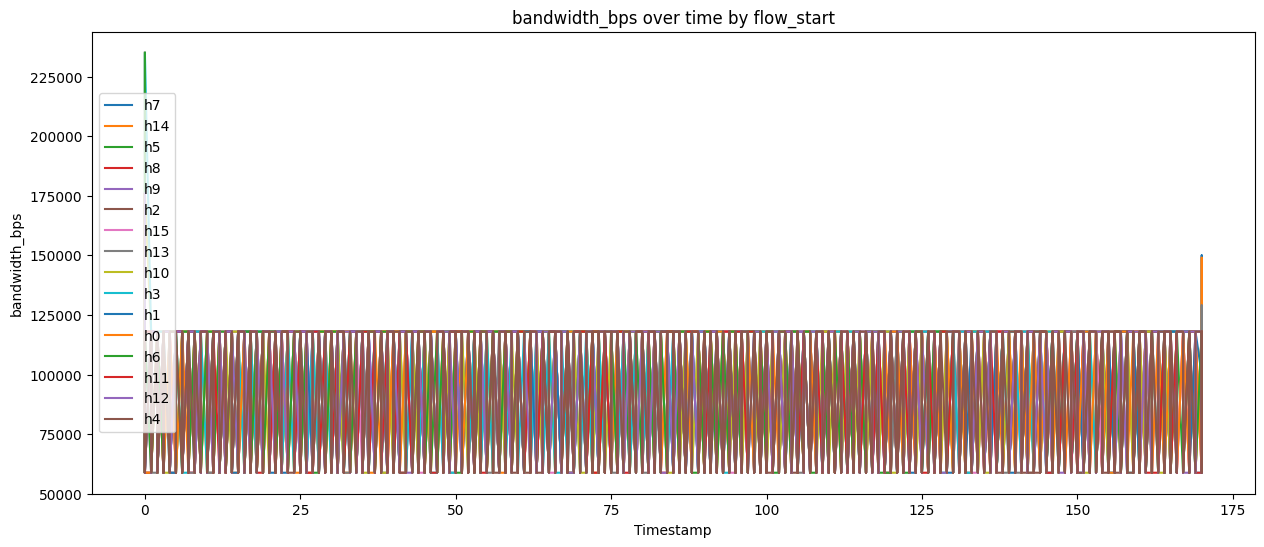

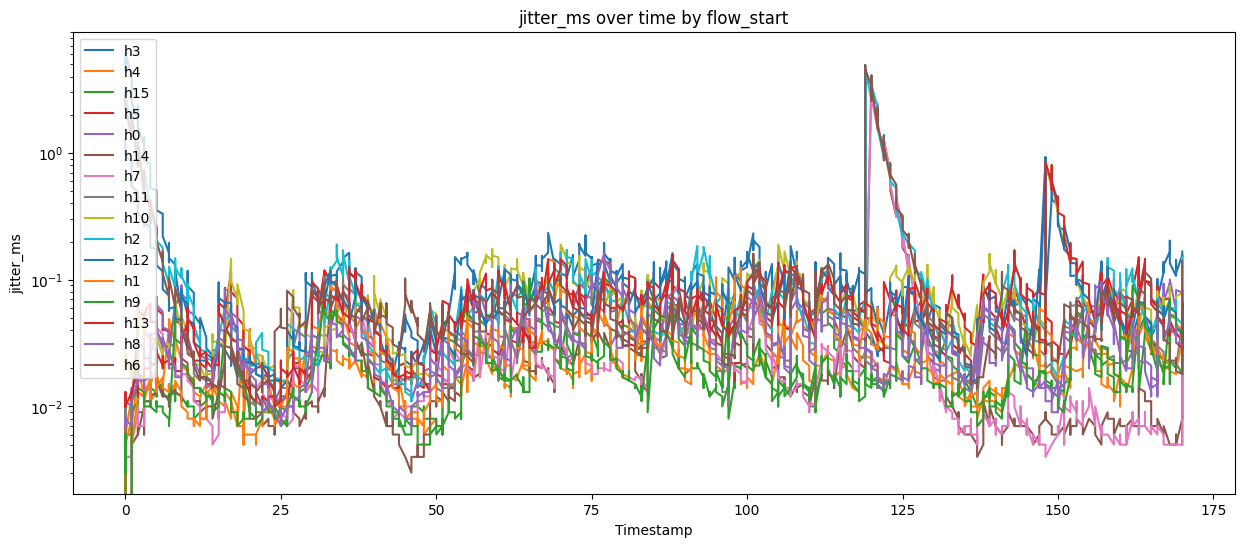

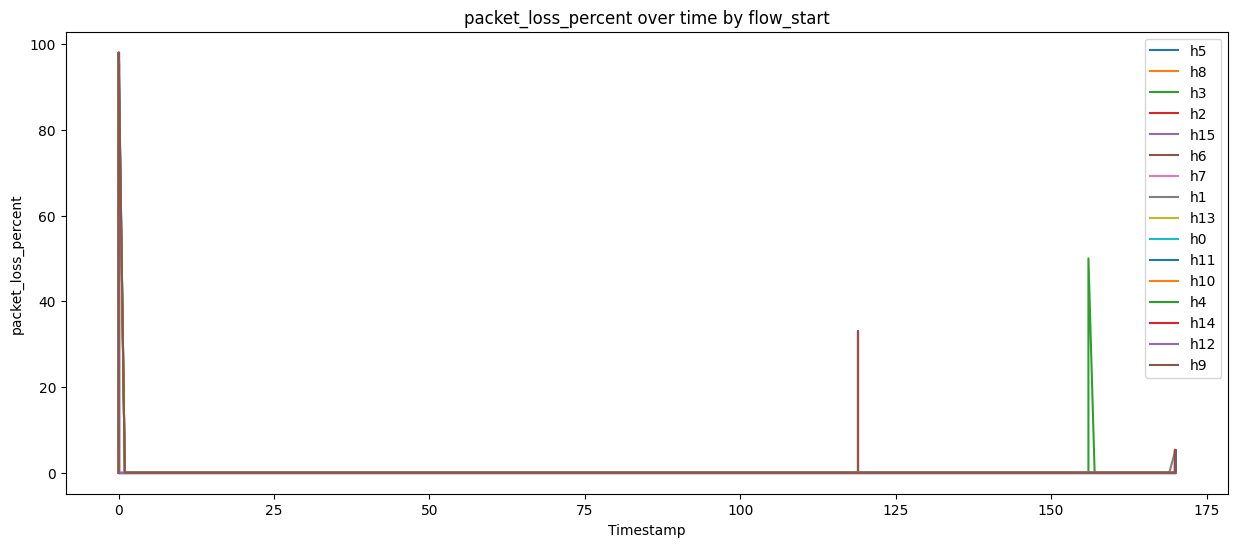

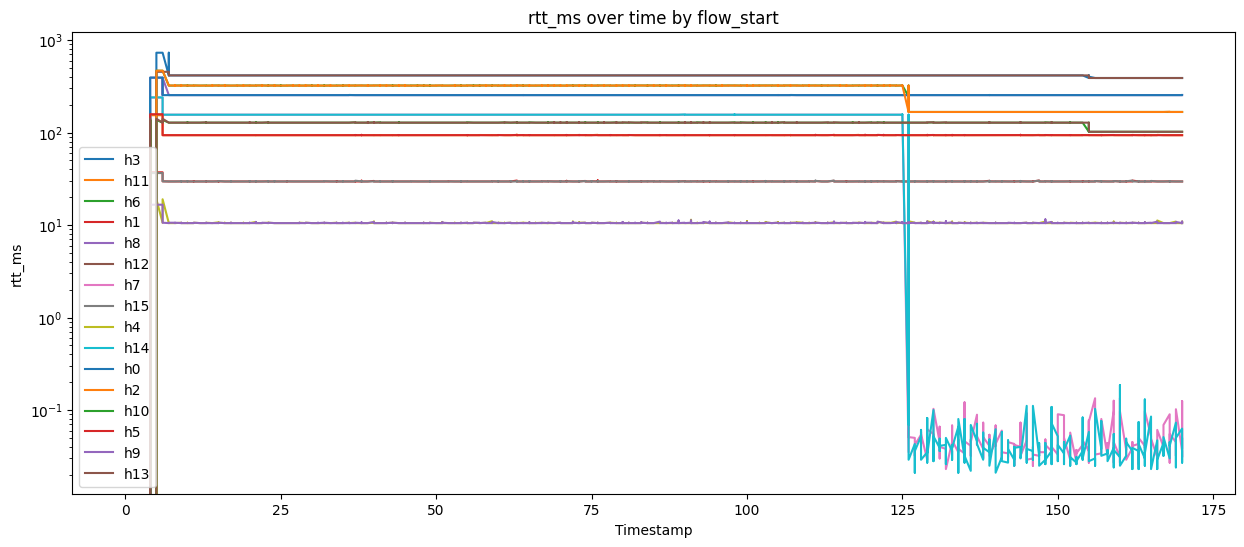

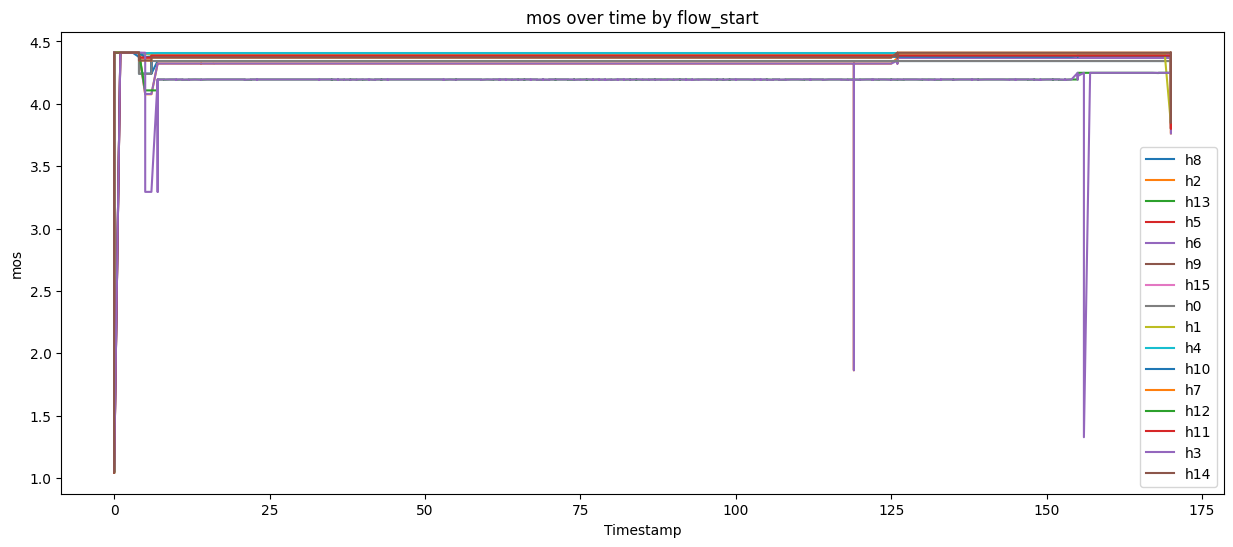

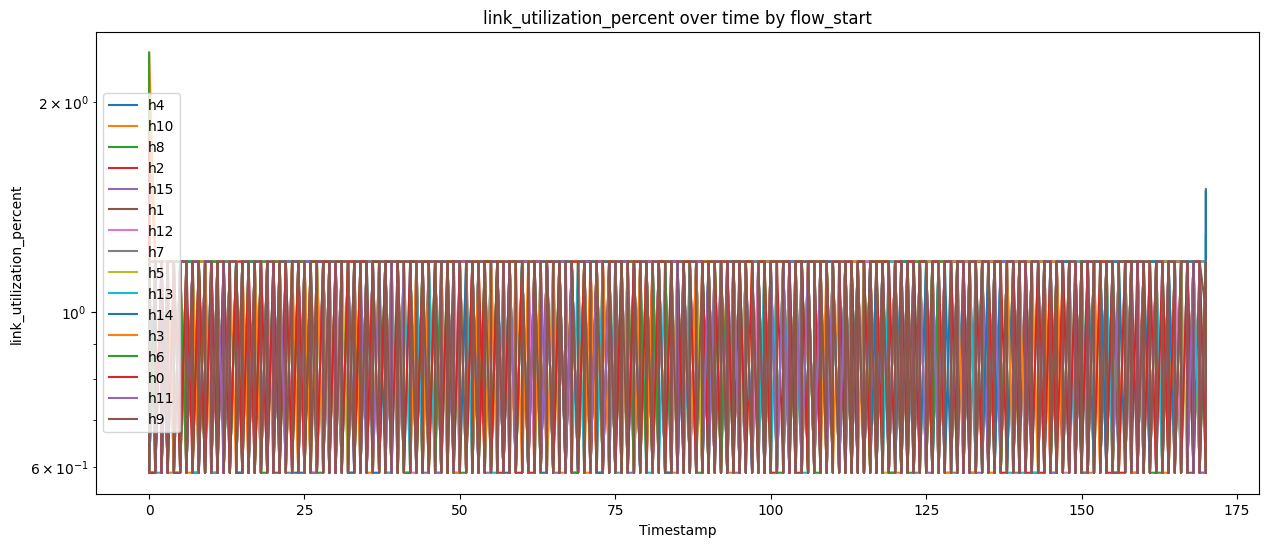

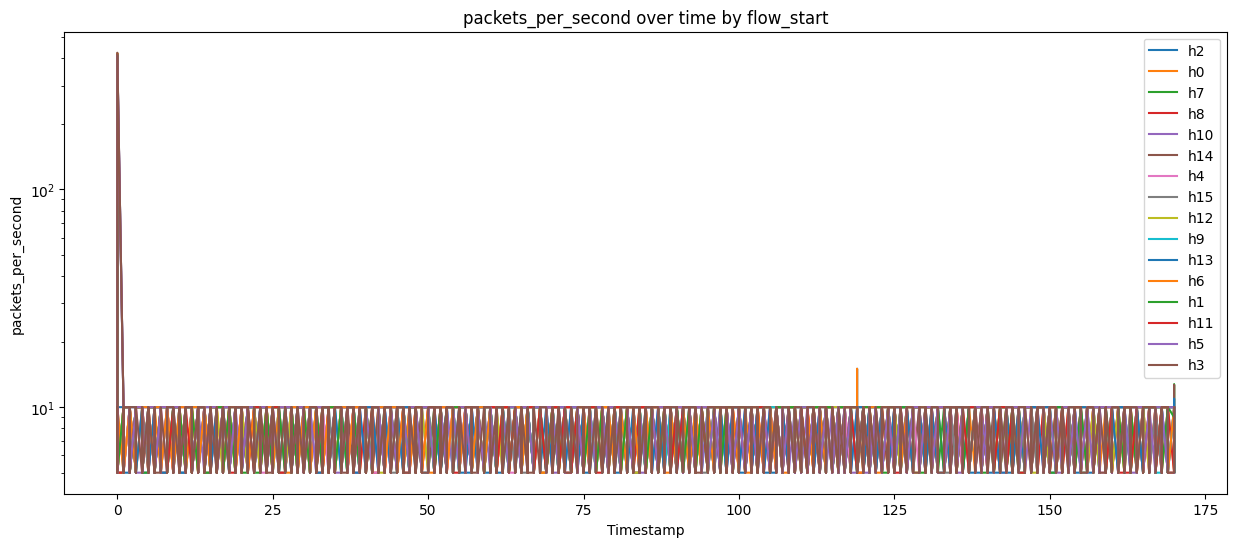

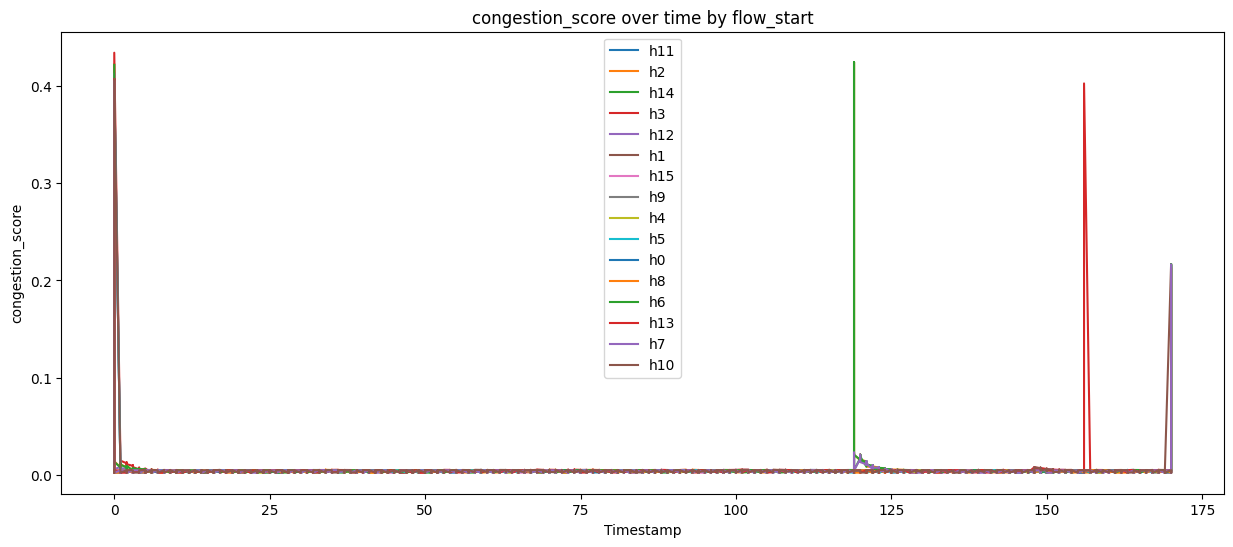

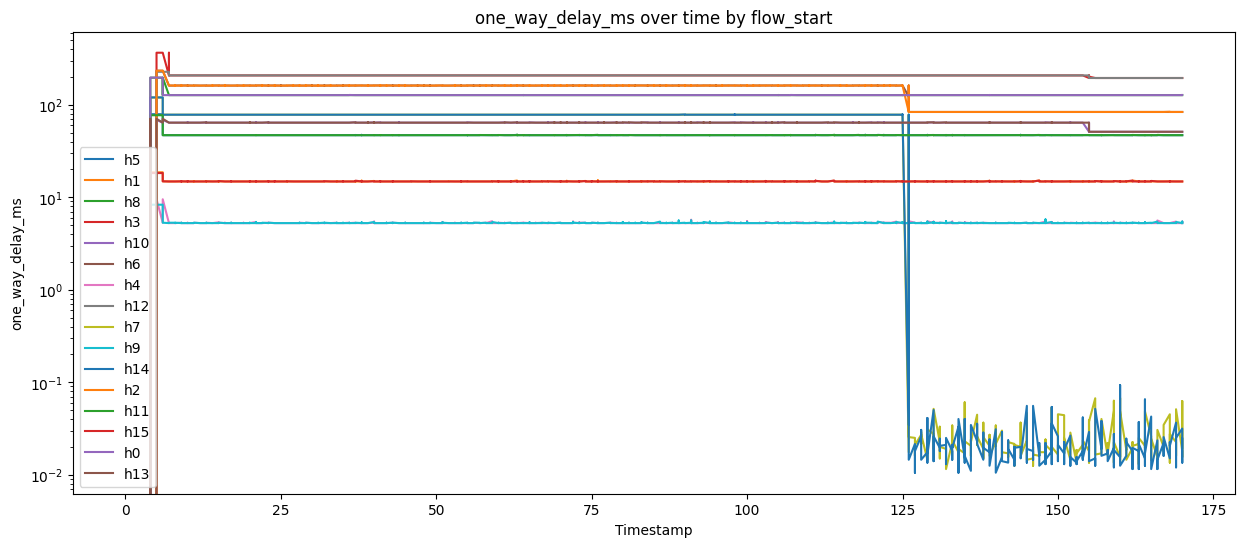

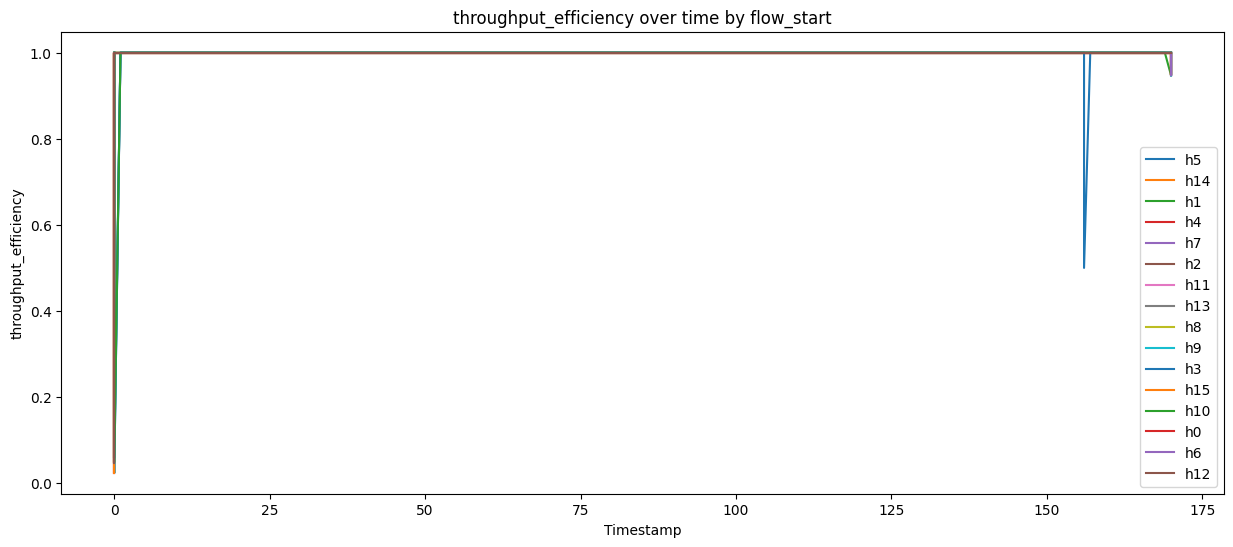

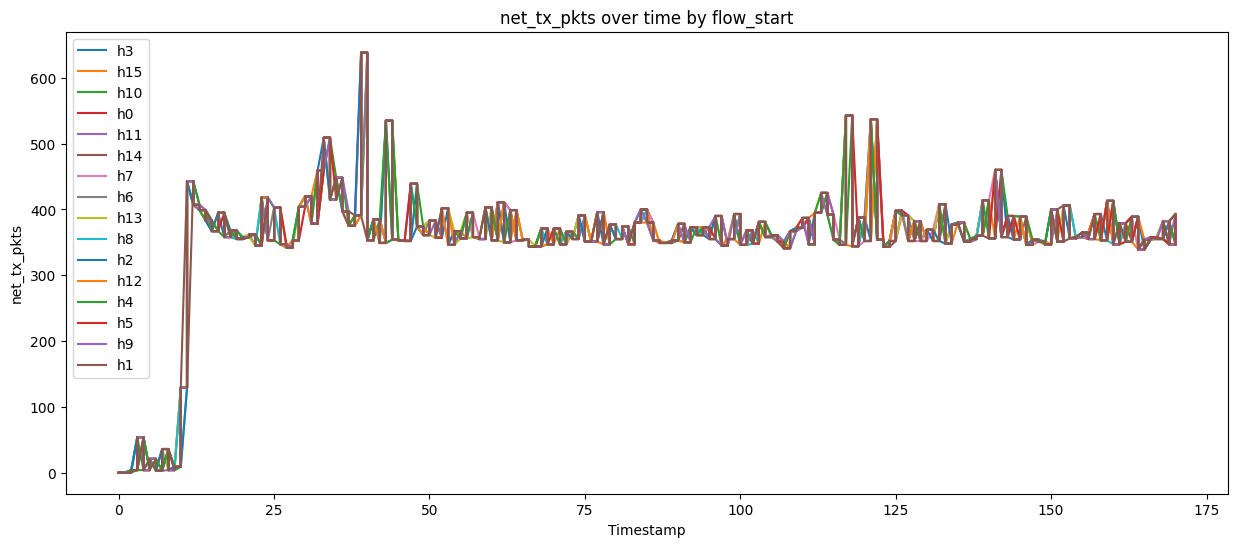

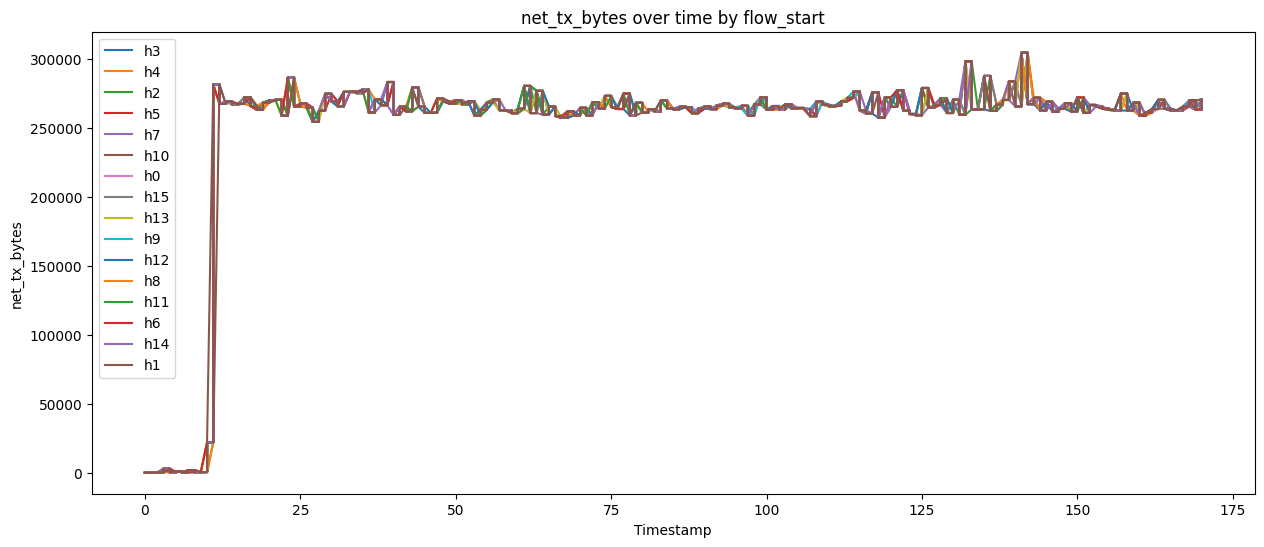

In [65]:
logscale_cols = [
    "jitter_ms",
    # "congestion_score",
    # "net_tx_pkts",
    # "net_tx_bytes",
    # "bandwidth_bps",
    "packets_per_second",
    "link_utilization_percent",
    "one_way_delay_ms",
    "rtt_ms",
]

for col in TARGET_COLUMNS:
    plot_device_stats(col, logscale=col in logscale_cols)

In [66]:
df.group_by("flow_start").all().select(TARGET_COLUMNS)

bandwidth_bps,jitter_ms,packet_loss_percent,rtt_ms,mos,link_utilization_percent,packets_per_second,congestion_score,one_way_delay_ms,throughput_efficiency,net_tx_pkts,net_tx_bytes
list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[i64],list[i64]
"[118000.0, 118000.0, … 100000.0]","[0.003, 0.006, … 0.023]","[0.0, 0.0, … 5.3]","[0.0, 0.0, … 10.5]","[4.409286, 4.409286, … 3.844209]","[1.18, 1.18, … 1.0]","[10.0, 10.0, … 8.984415]","[0.004732, 0.004744, … 0.216092]","[0.0, 0.0, … 5.25]","[1.0, 1.0, … 0.947162]","[0, 0, … 393]","[0, 0, … 270352]"
"[176000.0, 118000.0, … 58800.0]","[1.308, 1.166, … 0.036]","[96.0, 0.0, … 0.0]","[0.0, 0.0, … 389.0]","[1.05178, 4.409286, … 4.248253]","[1.76, 1.18, … 0.588]","[420.0, 10.0, … 5.0]","[0.412272, 0.009384, … 0.002496]","[0.0, 0.0, … 194.5]","[0.047619, 1.0, … 1.0]","[0, 0, … 347]","[0, 0, … 263074]"
"[118000.0, 118000.0, … 118000.0]","[0.008, 0.011, … 0.049]","[0.0, 0.0, … 0.0]","[0.0, 0.0, … 93.7]","[4.409286, 4.409286, … 4.386472]","[1.18, 1.18, … 1.18]","[10.0, 10.0, … 10.0]","[0.004752, 0.004764, … 0.004916]","[0.0, 0.0, … 46.85]","[1.0, 1.0, … 1.0]","[0, 0, … 347]","[0, 0, … 263074]"
"[235000.0, 58800.0, … 100000.0]","[3.044, 2.854, … 0.14]","[95.0, 0.0, … 5.3]","[0.0, 0.0, … 167.0]","[1.056378, 4.409286, … 3.762999]","[2.35, 0.588, … 1.0]","[420.0, 5.0, … 8.990796]","[0.421576, 0.013768, … 0.21656]","[0.0, 0.0, … 83.5]","[0.059524, 1.0, … 0.947162]","[0, 0, … 393]","[0, 0, … 270352]"
"[118000.0, 118000.0, … 100000.0]","[0.0, 0.004, … 0.075]","[98.0, 0.0, … 5.3]","[0.0, 0.0, … 0.039]","[1.043165, 4.409286, … 3.849523]","[1.18, 1.18, … 1.0]","[415.0, 10.0, … 8.988134]","[0.40472, 0.004736, … 0.2163]","[0.0, 0.0, … 0.0195]","[0.024096, 1.0, … 0.947162]","[0, 0, … 393]","[0, 0, … 270352]"
…,…,…,…,…,…,…,…,…,…,…,…
"[118000.0, 118000.0, … 118000.0]","[0.006, 0.006, … 0.024]","[0.0, 0.0, … 0.0]","[0.0, 0.0, … 29.6]","[4.409286, 4.409286, … 4.402305]","[1.18, 1.18, … 1.18]","[10.0, 10.0, … 10.0]","[0.004744, 0.004744, … 0.004816]","[0.0, 0.0, … 14.8]","[1.0, 1.0, … 1.0]","[0, 0, … 347]","[0, 0, … 263074]"
"[118000.0, 58800.0, … 118000.0]","[5.427, 5.088, … 0.167]","[0.0, 0.0, … 0.0]","[0.0, 0.0, … 389.0]","[4.409286, 4.409286, … 4.248253]","[1.18, 0.588, … 1.18]","[10.0, 5.0, … 10.0]","[0.026428, 0.022704, … 0.005388]","[0.0, 0.0, … 194.5]","[1.0, 1.0, … 1.0]","[0, 0, … 347]","[0, 0, … 263074]"
"[58800.0, 118000.0, … 100000.0]","[0.01, 0.013, … 0.066]","[0.0, 0.0, … 5.2]","[0.0, 0.0, … 102.0]","[4.409286, 4.409286, … 3.808005]","[0.588, 1.18, … 1.0]","[5.0, 10.0, … 8.976256]","[0.002392, 0.004772, … 0.212264]","[0.0, 0.0, … 51.0]","[1.0, 1.0, … 0.948467]","[0, 0, … 393]","[0, 0, … 270352]"


In [67]:
grouped_df = df.group_by(["flow_start"]).all().sort("flow_start")
grouped_df.head()

flow_start,timestamp,flow_id,interval_start,interval_end,bandwidth_bps,jitter_ms,packet_loss_cnt,packet_loss_percent,rtt_ms,mos,link_utilization_percent,packets_per_second,congestion_score,one_way_delay_ms,throughput_efficiency,net_tx_pkts,net_tx_bytes,flow_end
str,list[i32],list[str],list[i32],list[i32],list[f64],list[f64],list[i64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[i64],list[i64],list[str]
"""h0""","[0, 0, … 170]","[""h0->h8"", ""h0->h8"", … ""h0->h8""]","[0, 0, … 170]","[0, 0, … 170]","[118000.0, 118000.0, … 118000.0]","[0.012, 0.011, … 0.082]","[0, 0, … 0]","[0.0, 0.0, … 0.0]","[0.0, 0.0, … 255.0]","[4.409286, 4.409286, … 4.342415]","[1.18, 1.18, … 1.18]","[10.0, 10.0, … 10.0]","[0.004768, 0.004764, … 0.005048]","[0.0, 0.0, … 127.5]","[1.0, 1.0, … 1.0]","[0, 0, … 347]","[0, 0, … 263074]","[""h8"", ""h8"", … ""h8""]"
"""h1""","[0, 0, … 170]","[""h1->h15"", ""h1->h15"", … ""h1->h15""]","[0, 0, … 169]","[0, 0, … 170]","[118000.0, 118000.0, … 58800.0]","[0.005, 0.0, … 0.019]","[0, 81, … 0]","[0.0, 98.0, … 0.0]","[0.0, 0.0, … 29.6]","[4.409286, 1.043165, … 4.402305]","[1.18, 1.18, … 0.588]","[10.0, 415.0, … 4.997501]","[0.00474, 0.40472, … 0.002428]","[0.0, 0.0, … 14.8]","[1.0, 0.024096, … 1.0]","[0, 0, … 347]","[0, 0, … 263074]","[""h15"", ""h15"", … ""h15""]"
"""h10""","[0, 0, … 170]","[""h10->h13"", ""h10->h13"", … ""h10->h13""]","[0, 0, … 170]","[0, 0, … 170]","[118000.0, 58800.0, … 58800.0]","[0.023, 0.022, … 0.074]","[0, 0, … 0]","[0.0, 0.0, … 0.0]","[0.0, 0.0, … 102.0]","[4.409286, 4.409286, … 4.384351]","[1.18, 0.588, … 0.588]","[10.0, 5.0, … 5.0]","[0.004812, 0.00244, … 0.002648]","[0.0, 0.0, … 51.0]","[1.0, 1.0, … 1.0]","[0, 0, … 393]","[0, 0, … 270352]","[""h13"", ""h13"", … ""h13""]"
"""h11""","[0, 0, … 170]","[""h11->h5"", ""h11->h5"", … ""h11->h5""]","[0, 0, … 170]","[0, 0, … 170]","[118000.0, 118000.0, … 118000.0]","[0.008, 0.011, … 0.049]","[0, 0, … 0]","[0.0, 0.0, … 0.0]","[0.0, 0.0, … 93.7]","[4.409286, 4.409286, … 4.386472]","[1.18, 1.18, … 1.18]","[10.0, 10.0, … 10.0]","[0.004752, 0.004764, … 0.004916]","[0.0, 0.0, … 46.85]","[1.0, 1.0, … 1.0]","[0, 0, … 347]","[0, 0, … 263074]","[""h5"", ""h5"", … ""h5""]"
"""h12""","[0, 0, … 170]","[""h12->h3"", ""h12->h3"", … ""h12->h3""]","[0, 0, … 170]","[0, 0, … 170]","[176000.0, 118000.0, … 58800.0]","[1.308, 1.166, … 0.036]","[81, 0, … 0]","[96.0, 0.0, … 0.0]","[0.0, 0.0, … 389.0]","[1.05178, 4.409286, … 4.248253]","[1.76, 1.18, … 0.588]","[420.0, 10.0, … 5.0]","[0.412272, 0.009384, … 0.002496]","[0.0, 0.0, … 194.5]","[0.047619, 1.0, … 1.0]","[0, 0, … 347]","[0, 0, … 263074]","[""h3"", ""h3"", … ""h3""]"


In [68]:
len(grouped_df)

16

In [69]:
timestamps = grouped_df["timestamp"]
timestamps.describe()

statistic,value
str,f64
"""count""",16.0
"""null_count""",0.0


In [70]:
grouped_df = grouped_df.select(TARGET_COLUMNS)
grouped_df.head()

bandwidth_bps,jitter_ms,packet_loss_percent,rtt_ms,mos,link_utilization_percent,packets_per_second,congestion_score,one_way_delay_ms,throughput_efficiency,net_tx_pkts,net_tx_bytes
list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[i64],list[i64]
"[118000.0, 118000.0, … 118000.0]","[0.012, 0.011, … 0.082]","[0.0, 0.0, … 0.0]","[0.0, 0.0, … 255.0]","[4.409286, 4.409286, … 4.342415]","[1.18, 1.18, … 1.18]","[10.0, 10.0, … 10.0]","[0.004768, 0.004764, … 0.005048]","[0.0, 0.0, … 127.5]","[1.0, 1.0, … 1.0]","[0, 0, … 347]","[0, 0, … 263074]"
"[118000.0, 118000.0, … 58800.0]","[0.005, 0.0, … 0.019]","[0.0, 98.0, … 0.0]","[0.0, 0.0, … 29.6]","[4.409286, 1.043165, … 4.402305]","[1.18, 1.18, … 0.588]","[10.0, 415.0, … 4.997501]","[0.00474, 0.40472, … 0.002428]","[0.0, 0.0, … 14.8]","[1.0, 0.024096, … 1.0]","[0, 0, … 347]","[0, 0, … 263074]"
"[118000.0, 58800.0, … 58800.0]","[0.023, 0.022, … 0.074]","[0.0, 0.0, … 0.0]","[0.0, 0.0, … 102.0]","[4.409286, 4.409286, … 4.384351]","[1.18, 0.588, … 0.588]","[10.0, 5.0, … 5.0]","[0.004812, 0.00244, … 0.002648]","[0.0, 0.0, … 51.0]","[1.0, 1.0, … 1.0]","[0, 0, … 393]","[0, 0, … 270352]"
"[118000.0, 118000.0, … 118000.0]","[0.008, 0.011, … 0.049]","[0.0, 0.0, … 0.0]","[0.0, 0.0, … 93.7]","[4.409286, 4.409286, … 4.386472]","[1.18, 1.18, … 1.18]","[10.0, 10.0, … 10.0]","[0.004752, 0.004764, … 0.004916]","[0.0, 0.0, … 46.85]","[1.0, 1.0, … 1.0]","[0, 0, … 347]","[0, 0, … 263074]"
"[176000.0, 118000.0, … 58800.0]","[1.308, 1.166, … 0.036]","[96.0, 0.0, … 0.0]","[0.0, 0.0, … 389.0]","[1.05178, 4.409286, … 4.248253]","[1.76, 1.18, … 0.588]","[420.0, 10.0, … 5.0]","[0.412272, 0.009384, … 0.002496]","[0.0, 0.0, … 194.5]","[0.047619, 1.0, … 1.0]","[0, 0, … 347]","[0, 0, … 263074]"


In [71]:
num_devices = len(grouped_df)
num_metrics = len(TARGET_COLUMNS)
points_per_variable = min(len(ts) for ts in timestamps)

num_devices, num_metrics, points_per_variable

(16, 12, 852)

In [72]:
all(len(t) == points_per_variable for t in timestamps)

False

In [73]:
[(i, len(ts)) for i, ts in enumerate(timestamps)]

[(0, 853),
 (1, 854),
 (2, 854),
 (3, 854),
 (4, 852),
 (5, 855),
 (6, 854),
 (7, 854),
 (8, 854),
 (9, 852),
 (10, 854),
 (11, 854),
 (12, 854),
 (13, 854),
 (14, 852),
 (15, 854)]

In [74]:
final_data = np.zeros(shape=(num_devices, num_metrics, points_per_variable))
final_data.shape

(16, 12, 852)

In [75]:
for idx in range(num_devices):
    for col_idx, col in enumerate(TARGET_COLUMNS):
        target_array = grouped_df[col][idx].to_numpy()[:points_per_variable]
        final_data[idx, col_idx] = target_array

In [76]:
np.allclose(final_data[0][0], grouped_df["bandwidth_bps"][0][:points_per_variable])

True

In [77]:
import sys

sys.path.append("../")

In [78]:
from src.data.rnn import partition_logs

In [79]:
series, targets = partition_logs(
    final_data,
    lookback=64,
    horizon=16,
)

In [80]:
series.shape, targets.shape

((773, 16, 12, 64), (773, 16, 12, 16))

In [81]:
series[0, :, 0, 1], targets[0, :, 0, 0]

(array([118000., 118000.,  58800., 118000., 118000., 118000., 118000.,
        118000., 118000.,  58800., 118000., 118000.,  58800., 118000.,
        118000., 118000.]),
 array([ 58800.,  58800., 118000., 118000.,  58800., 118000., 118000.,
        118000., 118000., 118000., 118000., 118000., 118000., 118000.,
         58800., 118000.]))

In [82]:
series[1, :, 0, 1]

array([176000., 118000., 118000.,  58800., 118000., 176000., 118000.,
       118000., 118000., 118000., 118000.,  58800., 118000., 118000.,
       176000.,  58800.])